# 문장 토큰 단위 분류 모델 학습

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
3, 4, 5기 멘토
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.




본 실습에서는 BERT를 활용한 토큰 분류 모델을 학습해봅시다.

이번 task의 목적은, 문장 토큰 분류 모델을 학습하기 위한 데이터셋 전처리를 진행하고, 해당 데이터셋으로 BERT 기반의 토큰 분류 모델을 학습합니다.

실습에는 kmounlp의 NER 데이터셋을 사용하며, [링크](https://github.com/kmounlp/NER)에서 받으실 수 있습니다.

본 데이터셋은 다음의 [라이센스](https://github.com/kmounlp/NER/blob/master/LICENSE)를 가집니다.

### 1. CPU 및 GPU 환경설정

In [1]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Ti'

### 2. 데이터셋

In [5]:
# !git clone https://github.com/kmounlp/NER.git

In [6]:
import os
import glob

In [7]:
file_list = []

In [8]:
for x in os.walk('./NER/'):
    for y in glob.glob(os.path.join(x[0], '*_NER.txt')):    # ner.*, *_NER.txt
        file_list.append(y)

In [9]:
file_list = sorted(file_list)

In [10]:
for file_path in file_list:
    print(file_path)

./NER/말뭉치 - 형태소_개체명/00002_NER.txt
./NER/말뭉치 - 형태소_개체명/00003_NER.txt
./NER/말뭉치 - 형태소_개체명/00004_NER.txt
./NER/말뭉치 - 형태소_개체명/00005_NER.txt
./NER/말뭉치 - 형태소_개체명/00006_NER.txt
./NER/말뭉치 - 형태소_개체명/00007_NER.txt
./NER/말뭉치 - 형태소_개체명/00008_NER.txt
./NER/말뭉치 - 형태소_개체명/00009_NER.txt
./NER/말뭉치 - 형태소_개체명/00010_NER.txt
./NER/말뭉치 - 형태소_개체명/00011_NER.txt
./NER/말뭉치 - 형태소_개체명/00012_NER.txt
./NER/말뭉치 - 형태소_개체명/00013_NER.txt
./NER/말뭉치 - 형태소_개체명/00014_NER.txt
./NER/말뭉치 - 형태소_개체명/00015_NER.txt
./NER/말뭉치 - 형태소_개체명/00016_NER.txt
./NER/말뭉치 - 형태소_개체명/00017_NER.txt
./NER/말뭉치 - 형태소_개체명/00018_NER.txt
./NER/말뭉치 - 형태소_개체명/00019_NER.txt
./NER/말뭉치 - 형태소_개체명/00020_NER.txt
./NER/말뭉치 - 형태소_개체명/00021_NER.txt
./NER/말뭉치 - 형태소_개체명/00022_NER.txt
./NER/말뭉치 - 형태소_개체명/00023_NER.txt
./NER/말뭉치 - 형태소_개체명/00024_NER.txt
./NER/말뭉치 - 형태소_개체명/00025_NER.txt
./NER/말뭉치 - 형태소_개체명/00026_NER.txt
./NER/말뭉치 - 형태소_개체명/00027_NER.txt
./NER/말뭉치 - 형태소_개체명/00028_NER.txt
./NER/말뭉치 - 형태소_개체명/00029_NER.txt
./NER/말뭉치 - 형태소_개체명/00030_NER.txt
./NER/말뭉치 - 형태

### 3. 허깅페이스 트랜스포머 설치

In [11]:
# !pip install transformers

### 4. 데이터셋 샘플

In [12]:
from pathlib import Path

In [13]:
file_path = file_list[0]
file_path = Path(file_path)
raw_text = file_path.read_text().strip()

In [14]:
print(raw_text[0:1000])

## 1
## 오에 겐자부로는 일본 현대문학의 초석을 놓은 것으로 평가받는 작가 나쓰메 소세키(1867~1916)의 대표작 ‘마음’에 담긴 군국주의적 요소, 야스쿠니 신사 참배 행위까지 소설의 삽화로 동원하며 일본 사회의 ‘비정상성’을 문제 삼는다.
## <오에 겐자부로:PER>는 <일본:LOC> 현대문학의 초석을 놓은 것으로 평가받는 작가 <나쓰메 소세키:PER>(<1867~1916:DUR>)의 대표작 ‘<마음:POH>’에 담긴 군국주의적 요소, <야스쿠니 신사:ORG> 참배 행위까지 소설의 삽화로 동원하며 <일본:ORG> 사회의 ‘비정상성’을 문제 삼는다.
오에	오에	NNG	B-PER
_	_	_	I-PER
겐자부로	겐자부로	NNP	I-PER
는	는	JX	O
_	_	_	O
일본	일본	NNP	B-LOC
_	_	_	O
현대	현대	NNG	O
문학	문학	NNG	O
의	의	JKG	O
_	_	_	O
초석	초석	NNG	O
을	을	JKO	O
_	_	_	O
놓	놓	VV	O
은	은	ETM	O
_	_	_	O
것	것	NNB	O
으로	으로	JKB	O
_	_	_	O
평가	평가	NNG	O
받	받	VV	O
는	는	ETM	O
_	_	_	O
작가	작가	NNG	O
_	_	_	O
나쓰메	나쓰메	NNP	B-PER
_	_	_	I-PER
소세키	소세키	NNP	I-PER
(	(	SS	O
1867	1867	SN	B-DUR
~	~	SO	I-DUR
1916	1916	SN	I-DUR
)	)	SS	O
의	의	JKG	O
_	_	_	O
대표작	대표작	NNG	O
_	_	_	O
‘	‘	SS	O
마음	마음	NNG	B-POH
’	’	SS	O
에	에	JKB	O
_	_	_	O
담긴	담기+ㄴ	VV+ETM	O
_	_	_	O
군국주의	군국주의	NNG	O
적	적	XSN	O
_	_	_	O
요소	요소	NNG	O
,	,	SP	O
_	_	_	O
야스쿠니	야스쿠니	NNP	B-ORG
_	_	_	I-ORG
신사	신사	NNG	I-ORG
_	_	_	O
참배	참배	NNG	O
_	_	_	O
행위	행위	NNG	O
까지	까지	JX	O
_	_	_	O
소설

### 5. 데이터셋 전처리

In [15]:
import re

In [16]:
def read_file(file_list):
    token_docs = []
    tag_docs = []
    
    for file_path in file_list: # 모든 파일 내 하나의 파일
        # print("read file from ", file_path)
        file_path = Path(file_path)
        raw_text = file_path.read_text().strip()
        raw_docs = re.split(r'\n\t?\n', raw_text)
        
        for doc in raw_docs: # 하나의 파일 내 모든 docs 중 하나의 doc
            tokens = []
            tags = []
            
            for line in doc.split('\n'): # 하나의 document 내 모든 lines 중 하나의 line
                if line[0:1] == "$" or line[0:1] == ";" or line[0:2] == "##":
                    continue
                try:
                    token = line.split('\t')[0]
                    tag = line.split('\t')[3]   # 2: pos, 3: ner
                    
                    for i, syllable in enumerate(token): # 하나의 line 내 모든 음절(토큰) 중 하나의 음절(토큰)
                        tokens.append(syllable)
                        modi_tag = tag
                        if i > 0:
                            if tag[0] == 'B':
                                modi_tag = 'I' + tag[1:]    # BIO tag를 부착할게요 :-)
                        tags.append(modi_tag)
                except:
                    print(line)
            token_docs.append(tokens)
            tag_docs.append(tags)

    return token_docs, tag_docs

In [17]:
texts, tags = read_file(file_list[:])

In [18]:
print(len(texts))
print(len(tags))

19263
19263


In [19]:
print(texts[0], end='\n\n') # 음절 단위로 잘 잘렸네요!
print(tags[0])

['오', '에', '_', '겐', '자', '부', '로', '는', '_', '일', '본', '_', '현', '대', '문', '학', '의', '_', '초', '석', '을', '_', '놓', '은', '_', '것', '으', '로', '_', '평', '가', '받', '는', '_', '작', '가', '_', '나', '쓰', '메', '_', '소', '세', '키', '(', '1', '8', '6', '7', '~', '1', '9', '1', '6', ')', '의', '_', '대', '표', '작', '_', '‘', '마', '음', '’', '에', '_', '담', '긴', '_', '군', '국', '주', '의', '적', '_', '요', '소', ',', '_', '야', '스', '쿠', '니', '_', '신', '사', '_', '참', '배', '_', '행', '위', '까', '지', '_', '소', '설', '의', '_', '삽', '화', '로', '_', '동', '원', '하', '며', '_', '일', '본', '_', '사', '회', '의', '_', '‘', '비', '정', '상', '성', '’', '을', '_', '문', '제', '_', '삼', '는', '다', '.']

['B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'B-DUR', 'I-DUR', 'I-DUR', 'I-DUR', 'I-DUR', 'I-DUR',

In [20]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [21]:
for i, tag in enumerate(unique_tags): # 해당 데이터가 제공하는 태그들의 종류(label)
    print(tag)  # 학습을 위한 label list를 확인합니다.

I-DAT
B-MNY
B-TIM
I-DUR
O
I-ORG
I-POH
B-NOH
B-DAT
B-PER
B-DUR
B-POH
I-TIM
I-NOH
I-MNY
I-PER
B-PNT
I-LOC
B-LOC
I-PNT
B-ORG


### 6. EDA

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
texts_len = [len(x) for x in texts]

**6.2 문장의 길이의 히스토그램**

Text(0, 0.5, 'Probability')

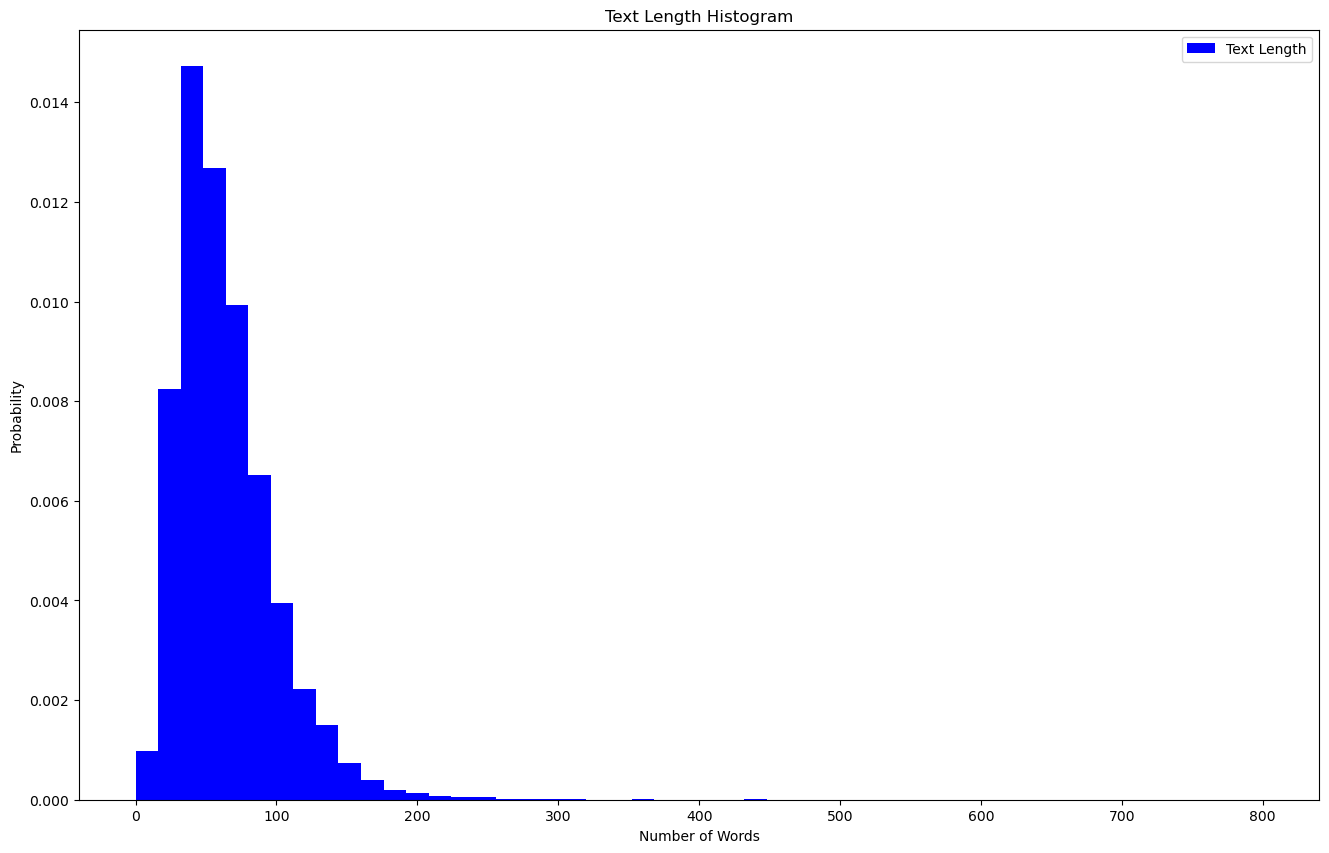

In [24]:
plt.figure(figsize=(16,10))
plt.hist(texts_len, bins=50, range=[0,800], facecolor='b', density=True, label='Text Length')
plt.title('Text Length Histogram')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Probability')

**6.4 각 NER 태그별 데이터에 포함된 갯수**

In [25]:
for tag in list(tag2id.keys()) : 
    globals()[tag] = 0 # 태그 이름(e.g., B-PER)을 가진 전역 변수를 만들고 0으로 초기화

In [26]:
# 첫 번째 doc의 첫 번째 문장:
# 오에 겐자부로는 일본 현대문학의 초석을 놓은 것으로 평가받는 작가 나쓰메 소세키(1867~1916)의 대표작 ‘마음’에 담긴 
# 군국주의적 요소, 야스쿠니 신사 참배 행위까지 소설의 삽화로 동원하며 일본 사회의 ‘비정상성’을 문제 삼는다.
tags[0] # 첫 번째 doc의 첫 번째 문장에 대한 태그 출력

['B-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'O',
 'O',
 'B-LOC',
 'I-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'O',
 'B-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'I-DUR',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-POH',
 'I-POH',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'I-ORG',
 'I-ORG',
 'I-ORG',
 'I-ORG',
 'I-ORG',
 'I-ORG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'I-ORG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [27]:
len(tags[0])

131

In [28]:
for tag in tags : 
    for ner in tag : 
        globals()[ner] += 1

In [29]:
for tag in sorted(list(tag2id.keys())): 
    print('{:>6} : {:>7,}'. format(tag, globals()[tag]))

 B-DAT :   5,383
 B-DUR :   1,207
 B-LOC :   6,313
 B-MNY :   1,440
 B-NOH :  11,051
 B-ORG :  13,089
 B-PER :  13,779
 B-PNT :   1,672
 B-POH :   6,686
 B-TIM :     371
 I-DAT :  14,433
 I-DUR :   4,573
 I-LOC :  16,537
 I-MNY :   6,930
 I-NOH :  23,967
 I-ORG :  41,320
 I-PER :  26,206
 I-PNT :   4,613
 I-POH :  37,156
 I-TIM :   1,876
     O : 983,746


### 7. Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2) # test 20%

In [31]:
print('Train 문장 : {:>6,}' .format(len(train_texts)))
print('Train 태그 : {:>6,}' .format(len(train_tags)))
print('Test  문장 : {:>6,}' .format(len(test_texts)))
print('Test  태그 : {:>6,}' .format(len(test_tags)))

Train 문장 : 15,410
Train 태그 : 15,410
Test  문장 :  3,853
Test  태그 :  3,853


### 8. BERT 토크나이저

In [32]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [33]:
pad_token_id = tokenizer.pad_token_id # 0
cls_token_id = tokenizer.cls_token_id # 101
sep_token_id = tokenizer.sep_token_id # 102
# special token도 tag화 하는 작업 -> 태그는 'O'
pad_token_label_id = tag2id['O']    # tag2id['O']
cls_token_label_id = tag2id['O']
sep_token_label_id = tag2id['O']

In [35]:
# 기존 토크나이저는 wordPiece tokenizer로 tokenizing 결과를 반환합니다.
# 데이터 단위를 음절 단위로 변경했기 때문에, tokenizer도 음절 tokenizer로 바꿀게요! :-)

def ner_tokenizer(sent, max_seq_length):    
    pre_syllable = "_"
    input_ids = [pad_token_id] * (max_seq_length - 1)
    attention_mask = [0] * (max_seq_length - 1)
    token_type_ids = [0] * max_seq_length
    sent = sent[:max_seq_length-2]

    for i, syllable in enumerate(sent): # 음절 단위 토큰으로 변경했기 때문에, 새로운 tokenizer를 사용해야 함
        if syllable == '_':
            pre_syllable = syllable
        if pre_syllable != "_":
            syllable = '##' + syllable  # 중간 음절에는 모두 prefix를 붙입니다.
            # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
        pre_syllable = syllable

        input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
        attention_mask[i] = 1
    
    input_ids = [cls_token_id] + input_ids
    input_ids[len(sent)+1] = sep_token_id
    attention_mask = [1] + attention_mask
    attention_mask[len(sent)+1] = 1
    return {"input_ids":input_ids,
            "attention_mask":attention_mask,
            "token_type_ids":token_type_ids}

In [37]:
train_texts[0]

['애',
 '플',
 '_',
 'i',
 'O',
 'S',
 '_',
 '8',
 '.',
 '3',
 ',',
 '_',
 '‘',
 '인',
 '종',
 '별',
 '_',
 '이',
 '모',
 '티',
 '콘',
 '_',
 '3',
 '0',
 '0',
 '종',
 '’',
 '_',
 '아',
 '시',
 '아',
 '인',
 '_',
 '얼',
 '굴',
 '이',
 '_',
 '헉',
 '!',
 '_',
 '‘',
 '황',
 '달',
 '?',
 '’']

In [48]:
for nt_key, nt_values in ner_tokenizer(train_texts[0], 20).items():
    print(nt_key)
    print(nt_values, end='\n\n')
# print(ner_tokenizer(train_texts[0], 10))

input_ids
[101, 9532, 119412, 168, 177, 11403, 10731, 168, 129, 110864, 10884, 110862, 168, 100, 12030, 22200, 61844, 168, 9638, 102]

attention_mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

token_type_ids
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



In [49]:
tokenized_train_sentences = []
tokenized_test_sentences = []
for text in train_texts:    # 전체 데이터를 tokenizing 합니다.
    tokenized_train_sentences.append(ner_tokenizer(text, 128))
for text in test_texts:
    tokenized_test_sentences.append(ner_tokenizer(text, 128))


In [50]:
def encode_tags(tags, max_seq_length):
    # label 역시 입력 token과 개수를 맞춰줍니다 :-)
    tags = tags[:max_seq_length-2]
    labels = [tag2id[tag] for tag in tags]
    labels = [tag2id['O']] + labels

    padding_length = max_seq_length - len(labels)
    labels = labels + ([pad_token_label_id] * padding_length)

    return labels

In [52]:
encode_tags(train_tags[0], 20)

[4, 20, 5, 4, 11, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [53]:
train_labels = []
test_labels = []

for tag in train_tags:
    train_labels.append(encode_tags(tag, 128))

for tag in test_tags:
    test_labels.append(encode_tags(tag, 128))

In [54]:
len(train_labels), len(test_labels)

(15410, 3853)

### 9. Token 데이터셋

In [55]:
import torch

# 여기 부터는 이제 지겨워지죠? :-)
class TokenDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TokenDataset(tokenized_train_sentences, train_labels)
test_dataset = TokenDataset(tokenized_test_sentences, test_labels)

In [56]:
from transformers import BertForTokenClassification, Trainer, TrainingArguments
import sys
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,
    learning_rate=3e-5,
    save_total_limit=5
)

### 10. BertForTokenClassification

In [57]:
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_tags))
model.to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at 

In [58]:
trainer.train() # 1 epoch에 대략 5분 정도 걸립니다.

/home/kingstar/anaconda3/envs/ml2/lib/python3.8/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: traintogpb. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,0.380400
200,0.169200
300,0.147100
400,0.129300
500,0.119600
600,0.119700
700,0.113900
800,0.108800
900,0.106500
1000,0.106100


TrainOutput(global_step=9635, training_loss=0.05657456991396609, metrics={'train_runtime': 1196.1696, 'train_samples_per_second': 64.414, 'train_steps_per_second': 8.055, 'total_flos': 5034093373785600.0, 'train_loss': 0.05657456991396609, 'epoch': 5.0})

### 11. New Data Inference

In [59]:
def ner_inference(text) : 
  
    model.eval()
    text = text.replace(' ', '_')

    predictions , true_labels = [], []
    
    tokenized_sent = ner_tokenizer(text, len(text)+2) # 마찬가지로 ner_tokenizer를 통해 음절 단위 토큰화 수행해줘야 함
    input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
    attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
    token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)    
    
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        
    logits = outputs['logits']
    logits = logits.detach().cpu().numpy()
    label_ids = token_type_ids.cpu().numpy()

    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.append(label_ids)

    pred_tags = [list(tag2id.keys())[p_i] for p in predictions for p_i in p]

    print('{}\t{}'.format("TOKEN", "TAG"))
    print("===========")
    # for token, tag in zip(tokenizer.decode(tokenized_sent['input_ids']), pred_tags):
    #   print("{:^5}\t{:^5}".format(token, tag))
    for i, tag in enumerate(pred_tags):
        print("{:^5}\t{:^5}".format(tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'][i]), tag))

In [60]:
text = '이순신은 조선 중기의 무신이다.'

In [61]:
ner_inference(text) # 조선은 ORG, 중기는 O였는데, 태그가 섞인 것 말고는 '조선 중기'는 DUR로 볼 수 있지 않나 싶음

TOKEN	TAG
[CLS]	  O  
  이  	B-PER
 ##순 	I-PER
 ##신 	I-PER
 ##은 	  O  
  _  	  O  
  조  	B-ORG
 ##선 	I-DUR
  _  	I-DUR
  중  	I-DUR
 ##기 	I-DUR
 ##의 	  O  
  _  	  O  
  무  	  O  
 ##신 	  O  
 ##이 	  O  
 ##다 	  O  
 ##. 	  O  
[SEP]	  O  


In [62]:
text = '로스트아크는 스마일게이트 RPG가 개발한 쿼터뷰 액션 MMORPG 게임이다.'
ner_inference(text) # 스마일게이트 RPG를 ORG로 인식 못함..

TOKEN	TAG
[CLS]	  O  
  로  	B-ORG
 ##스 	I-ORG
 ##트 	I-ORG
 ##아 	I-ORG
 ##크 	I-ORG
 ##는 	  O  
  _  	  O  
  스  	  O  
 ##마 	  O  
 ##일 	  O  
 ##게 	  O  
 ##이 	  O  
 ##트 	  O  
  _  	  O  
  R  	  O  
 ##P 	  O  
 ##G 	  O  
 ##가 	  O  
  _  	  O  
  개  	  O  
 ##발 	  O  
 ##한 	  O  
  _  	  O  
  쿼  	  O  
 ##터 	  O  
 ##뷰 	  O  
  _  	  O  
  액  	  O  
 ##션 	  O  
  _  	  O  
  M  	  O  
 ##M 	  O  
 ##O 	  O  
 ##R 	  O  
 ##P 	  O  
 ##G 	  O  
  _  	  O  
  게  	  O  
 ##임 	  O  
 ##이 	  O  
 ##다 	  O  
 ##. 	  O  
[SEP]	  O  


In [63]:
text = '2014년 11월 12일 최초 공개했으며 2018년 11월 7일부터 오픈 베타 테스트를 진행하다 2019년 12월 4일 정식 오픈했다.'
ner_inference(text) # DAT는 잘 인식하는듯

TOKEN	TAG
[CLS]	  O  
  2  	B-DAT
 ##0 	I-DAT
 ##1 	I-DAT
 ##4 	I-DAT
 ##년 	I-DAT
  _  	I-DAT
  1  	I-DAT
 ##1 	I-DAT
 ##월 	I-DAT
  _  	I-DAT
  1  	I-DAT
 ##2 	I-DAT
 ##일 	I-DAT
  _  	  O  
  최  	  O  
 ##초 	  O  
  _  	  O  
  공  	  O  
 ##개 	  O  
 ##했 	  O  
 ##으 	  O  
 ##며 	  O  
  _  	  O  
  2  	B-DAT
 ##0 	I-DAT
 ##1 	I-DAT
 ##8 	I-DAT
 ##년 	I-DAT
  _  	I-DAT
  1  	I-DAT
 ##1 	I-DAT
 ##월 	I-DAT
  _  	I-DAT
  7  	I-DAT
 ##일 	I-DAT
 ##부 	  O  
 ##터 	  O  
  _  	  O  
  오  	  O  
 ##픈 	  O  
  _  	  O  
  베  	  O  
 ##타 	  O  
  _  	  O  
  테  	  O  
 ##스 	  O  
 ##트 	  O  
 ##를 	  O  
  _  	  O  
  진  	  O  
 ##행 	  O  
 ##하 	  O  
 ##다 	  O  
  _  	  O  
  2  	B-DAT
 ##0 	I-DAT
 ##1 	I-DAT
 ##9 	I-DAT
 ##년 	I-DAT
  _  	I-DAT
  1  	I-DAT
 ##2 	I-DAT
 ##월 	I-DAT
  _  	I-DAT
  4  	I-DAT
 ##일 	I-DAT
  _  	  O  
  정  	  O  
 ##식 	  O  
  _  	  O  
  오  	  O  
 ##픈 	  O  
 ##했 	  O  
 ##다 	  O  
 ##. 	  O  
[SEP]	  O  


In [64]:
text = '충북 수출이 8개월째 20억달러를 넘어서고 있다'
ner_inference(text) # 충북을 원래는 ORG로 인식했는데, LOC으로 인식함 -> 이게 더 맞는 듯

TOKEN	TAG
[CLS]	  O  
  충  	B-LOC
 ##북 	I-LOC
  _  	  O  
  수  	  O  
 ##출 	  O  
 ##이 	  O  
  _  	  O  
  8  	B-DUR
 ##개 	I-DUR
 ##월 	I-DUR
 ##째 	I-DUR
  _  	  O  
  2  	B-MNY
 ##0 	I-MNY
 ##억 	I-MNY
 ##달 	I-MNY
 ##러 	I-MNY
 ##를 	  O  
  _  	  O  
  넘  	  O  
 ##어 	  O  
 ##서 	  O  
 ##고 	  O  
  _  	  O  
  있  	  O  
 ##다 	  O  
[SEP]	  O  


In [65]:
text = '짜장면 7,000원'
ner_inference(text) # MNY는 완벽 인식

TOKEN	TAG
[CLS]	  O  
  짜  	  O  
 ##장 	  O  
 ##면 	  O  
  _  	  O  
  7  	B-MNY
 ##, 	I-MNY
 ##0 	I-MNY
 ##0 	I-MNY
 ##0 	I-MNY
 ##원 	I-MNY
[SEP]	  O  
